In [1]:
# import all the libraries and packages which we may need as part of the data processing and analysis
from pathlib import Path # to interact with file system.
#from dmba import regressionSummary
import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.linear_model import LinearRegression # for linear regression model.

%matplotlib inline 
#renders the figure in a notebook
import matplotlib.pylab as plt


pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

# Common code Function for Sanity Verification

In [2]:
def check_for_missing_values(df):
    columns_with_na = []
    for column in df.columns:
        if df[column].isna().any():
            column_with_na.append(column)
    return columns_with_na

# Load Toyota Data

Load the data to a dataframe and review the data. 

In [3]:
# Load the sheet of data as the data is in 2nd Sheet and we will validate the dolumn types as well

toyota_df = pd.read_csv("ToyotaCorolla.csv")

toyota_df.dtypes

Id                    int64
Model                object
Price                 int64
Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
Fuel_Type            object
HP                    int64
Met_Color             int64
Color                object
Automatic             int64
CC                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim        

The above information suggests that most of the columns have numerical information and only few columns has string or text information. 

We could now check for each column to validate if we have null values or not for each column. 
This will allow us to handle that data differently

In [4]:
# Do Sanity checking of data for columns to ensure it handles null and NA data and its presence in the data set
if len(check_for_missing_values(toyota_df)) >0 :
    print(f"{check_for_missing_values(toyota_df)} has the NA values and we should rectify and solve it ")
else:
    print("No NA or null values in the imported data")




No NA or null values in the imported data


As output suggests none of the columns has the NA or nul values so no explicit coding or processing is not needed to handle missing values

In [5]:
# Now Summarize the data by ignoring 16000 CC car to ensure we get better mean and rest of the calculations 
np.round(toyota_df[toyota_df['CC'] != 16000].describe(),2)

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.0,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.0,1435.00,1435.00,1435.00
mean,722.00,10725.10,55.97,5.55,1999.62,68567.07,101.50,0.67,0.06,1566.80,4.03,4.0,5.03,87.11,1072.38,0.41,0.90,3.82,0.81,0.97,0.72,0.51,0.06,0.29,0.22,0.58,0.56,0.98,0.15,0.26,0.30,0.77,0.2,0.15,0.00,0.28
std,416.28,3621.73,18.59,3.35,1.54,37497.63,14.98,0.47,0.23,187.25,0.95,0.0,0.19,41.14,52.58,0.49,0.31,3.01,0.39,0.17,0.45,0.50,0.23,0.46,0.41,0.49,0.50,0.15,0.35,0.44,0.46,0.42,0.4,0.35,0.05,0.45
min,1.00,4350.00,1.00,1.00,1998.00,1.00,69.00,0.00,0.00,1300.00,2.00,4.0,3.00,19.00,1000.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
25%,362.50,8450.00,44.00,3.00,1998.00,43000.00,90.00,0.00,0.00,1400.00,3.00,4.0,5.00,69.00,1040.00,0.00,1.00,3.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00
50%,722.00,9900.00,61.00,5.00,1999.00,63451.00,110.00,1.00,0.00,1600.00,4.00,4.0,5.00,85.00,1070.00,0.00,1.00,3.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00
75%,1081.50,11950.00,70.00,8.00,2001.00,87041.50,110.00,1.00,0.00,1600.00,5.00,4.0,5.00,85.00,1085.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,0.0,0.00,0.00,1.00
max,1442.00,32500.00,80.00,12.00,2004.00,243000.00,192.00,1.00,1.00,2000.00,5.00,4.0,6.00,283.00,1615.00,1.00,1.00,36.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00


In [6]:
toyota_df[(toyota_df['Mfr_Guarantee'] ==0 ) & (toyota_df['BOVAG_Guarantee'] == 0) & (toyota_df['Guarantee_Period'] <=0 ) ].count()

Id                   0
Model                0
Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64

In [7]:
#Data type Information 

toyota_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


In [8]:
toyota_df.nunique()

Id                   1436
Model                 319
Price                 236
Age_08_04              77
Mfg_Month              12
Mfg_Year                7
KM                   1263
Fuel_Type               3
HP                     12
Met_Color               2
Color                  10
Automatic               2
CC                     13
Doors                   4
Cylinders               1
Gears                   4
Quarterly_Tax          13
Weight                 59
Mfr_Guarantee           2
BOVAG_Guarantee         2
Guarantee_Period        9
ABS                     2
Airbag_1                2
Airbag_2                2
Airco                   2
Automatic_airco         2
Boardcomputer           2
CD_Player               2
Central_Lock            2
Powered_Windows         2
Power_Steering          2
Radio                   2
Mistlamps               2
Sport_Model             2
Backseat_Divider        2
Metallic_Rim            2
Radio_cassette          2
Parking_Assistant       2
Tow_Bar     

# Normalize the KM 

In [9]:
# Normalize the Kilometer Variable in the DataSet with new vehicle around 0 KM and older and more KM as values closer to 1

mean_value_KM = toyota_df['KM'].mean()
std_value_KM = toyota_df['KM'].std()
toyota_df['standardized_KM'] = (toyota_df['KM'] - mean_value_KM)/std_value_KM

min_value_KM = toyota_df['standardized_KM'].min()
max_value_KM = toyota_df['standardized_KM'].max()

toyota_df['normalized_KM'] = (toyota_df['standardized_KM'] - min_value_KM)/(max_value_KM - min_value_KM)

print(toyota_df['normalized_KM'])




0       0.193355
1       0.300149
2       0.171647
3       0.197528
4       0.158433
          ...   
1431    0.084539
1432    0.078186
1433    0.070021
1434    0.069609
1435    0.000000
Name: normalized_KM, Length: 1436, dtype: float64


# Create the dummies for the Variable Fuel Type. 
As we notice we see that the fuel type has values of CNG, Diesel and Petrol
Let's convert those to numericals. Rest all the values seems to be already numerical. 
we notice that the datatype for Fuel is object change it to categorical


In [10]:
#print the current type for Fuel_Type
#change to category
print(toyota_df['Fuel_Type'].dtype)
toyota_df.Fuel_Type = toyota_df.Fuel_Type.astype('category')
print(toyota_df.Fuel_Type.cat.categories)  # It can take one of three levels
print(toyota_df.Fuel_Type.dtype)  # Type is now 'category'

object
Index(['CNG', 'Diesel', 'Petrol'], dtype='object')
category


In [11]:

dummies = pd.get_dummies(toyota_df['Fuel_Type'], drop_first=True)
dummies[(dummies['Diesel'] == 0) & (dummies['Petrol'] == 0)]
toyota_df = pd.concat([toyota_df, dummies], axis=1)
#toyota_df = toyota_df.drop('Fuel_type',axis=1)

toyota_df.loc[:,'Diesel':'Petrol'].head()



,Diesel,Petrol
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [12]:
# Check if the ENgine CC impacts the costs.
toyota_df.groupby('CC')['Price'].mean()

# It seems like the value 16000 is odd and it could potentially be an invalid record. The usual CC values are mostly less than 2000.
# Hence this seems an odd and invalid record.

CC
1300      8509.798387
1332      8375.000000
1398     10225.000000
1400     12847.573171
1587      9475.000000
1598     14777.500000
1600     10709.604734
1800     18010.714286
1900     10463.000000
1975     10950.000000
1995     19950.000000
2000     11532.487395
16000    18950.000000
Name: Price, dtype: float64

In [13]:
# Build the correlation of the data and see if we have any strong coorelation information
# Dropping the 16000 CC car from the corr model to check avoid any outlier in the data
corr_df = toyota_df.drop(columns=['Id','Model','Fuel_Type','Color', 'Cylinders','KM','normalized_KM'])
corr_df['Mfg_Month'] = corr_df['Mfg_Month'].astype(str).str.zfill(2)
corr_df['Mfg_Year'] = corr_df['Mfg_Year'].astype(str)
corr_df['month_year'] = pd.to_datetime('01' + corr_df['Mfg_Month'] + corr_df['Mfg_Year'], format='%d%m%Y')
corr_df = corr_df.drop(columns=['Mfg_Month','Mfg_Year'])


#corr_df['month_year']
corr_df['mfg_time'] = corr_df['month_year'].apply(lambda x:x.timestamp())
corr_df = corr_df.drop(columns=['month_year'])
corr_df = corr_df[corr_df['CC']!=16000]




In [14]:
# Running Correlation on the formatted data set 

corr_array = round(corr_df.corr(),2)
corr_array

,Price,Age_08_04,HP,Met_Color,Automatic,CC,Doors,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,standardized_KM,Diesel,Petrol,mfg_time
Price,1.00,-0.88,0.31,0.11,0.03,0.17,0.18,0.06,0.22,0.58,0.20,0.03,0.15,0.31,0.09,0.25,0.43,0.59,0.60,0.48,0.34,0.36,0.06,-0.04,0.22,0.17,0.11,0.11,-0.04,0.04,-0.17,-0.57,0.05,-0.04,0.88
Age_08_04,-0.88,1.00,-0.16,-0.11,0.04,-0.13,-0.15,-0.01,-0.20,-0.47,-0.17,0.00,-0.15,-0.41,-0.11,-0.33,-0.40,-0.42,-0.72,-0.51,-0.28,-0.28,-0.07,0.01,-0.13,-0.11,-0.12,-0.04,0.01,-0.05,0.19,0.50,-0.10,0.09,-1.00
HP,0.31,-0.16,1.00,0.06,0.01,0.05,0.09,0.21,-0.30,0.09,0.14,0.02,0.08,0.06,0.03,0.02,0.24,0.24,0.13,0.10,0.25,0.27,0.05,0.02,0.21,-0.01,0.01,0.21,0.02,0.03,0.07,-0.33,-0.53,0.49,0.16
Met_Color,0.11,-0.11,0.06,1.00,-0.02,0.03,0.08,0.02,0.01,0.06,0.16,0.01,0.01,0.02,0.10,0.04,0.11,0.03,0.09,0.20,0.15,0.14,0.09,0.07,0.02,0.00,0.04,0.05,0.07,0.04,0.15,-0.08,-0.01,0.00,0.11
Automatic,0.03,0.04,0.01,-0.02,1.00,-0.07,-0.03,-0.10,-0.06,0.05,0.03,0.03,-0.00,-0.02,-0.01,-0.00,-0.03,0.05,-0.04,-0.02,-0.00,-0.01,-0.00,-0.01,0.00,0.02,-0.01,-0.08,-0.01,0.16,0.02,-0.08,-0.08,0.08,-0.04
CC,0.17,-0.13,0.05,0.03,-0.07,1.00,0.13,0.04,0.68,0.65,-0.09,-0.03,-0.03,0.06,0.04,0.02,0.22,0.15,0.06,0.03,0.12,0.08,0.07,0.02,0.07,-0.04,-0.03,0.03,0.02,0.01,0.04,0.30,0.76,-0.73,0.13
Doors,0.18,-0.15,0.09,0.08,-0.03,0.13,1.00,-0.16,0.11,0.30,0.04,-0.01,0.05,0.06,0.05,0.02,0.17,0.05,0.09,0.09,0.13,0.11,0.06,-0.01,0.07,-0.13,-0.02,-0.04,-0.01,0.03,0.10,-0.04,0.03,-0.03,0.15
Gears,0.06,-0.01,0.21,0.02,-0.10,0.04,-0.16,1.00,-0.01,0.02,0.01,0.07,-0.03,0.09,0.00,0.10,0.15,0.08,-0.03,-0.05,0.13,0.13,0.02,0.02,0.24,0.17,0.08,0.30,0.02,-0.01,-0.03,0.01,-0.05,0.06,0.01
Quarterly_Tax,0.22,-0.20,-0.30,0.01,-0.06,0.68,0.11,-0.01,1.00,0.63,-0.02,0.10,-0.16,0.08,0.08,0.20,0.12,0.12,0.14,0.09,0.03,0.00,0.05,-0.03,0.02,0.07,0.20,-0.01,-0.03,-0.02,-0.00,0.28,0.79,-0.84,0.20
Weight,0.58,-0.47,0.09,0.06,0.05,0.65,0.30,0.02,0.63,1.00,-0.01,-0.05,-0.01,0.10,0.03,0.08,0.31,0.43,0.28,0.25,0.23,0.21,0.05,-0.04,0.14,0.13,0.04,0.05,-0.04,0.03,-0.07,-0.03,0.57,-0.56,0.47


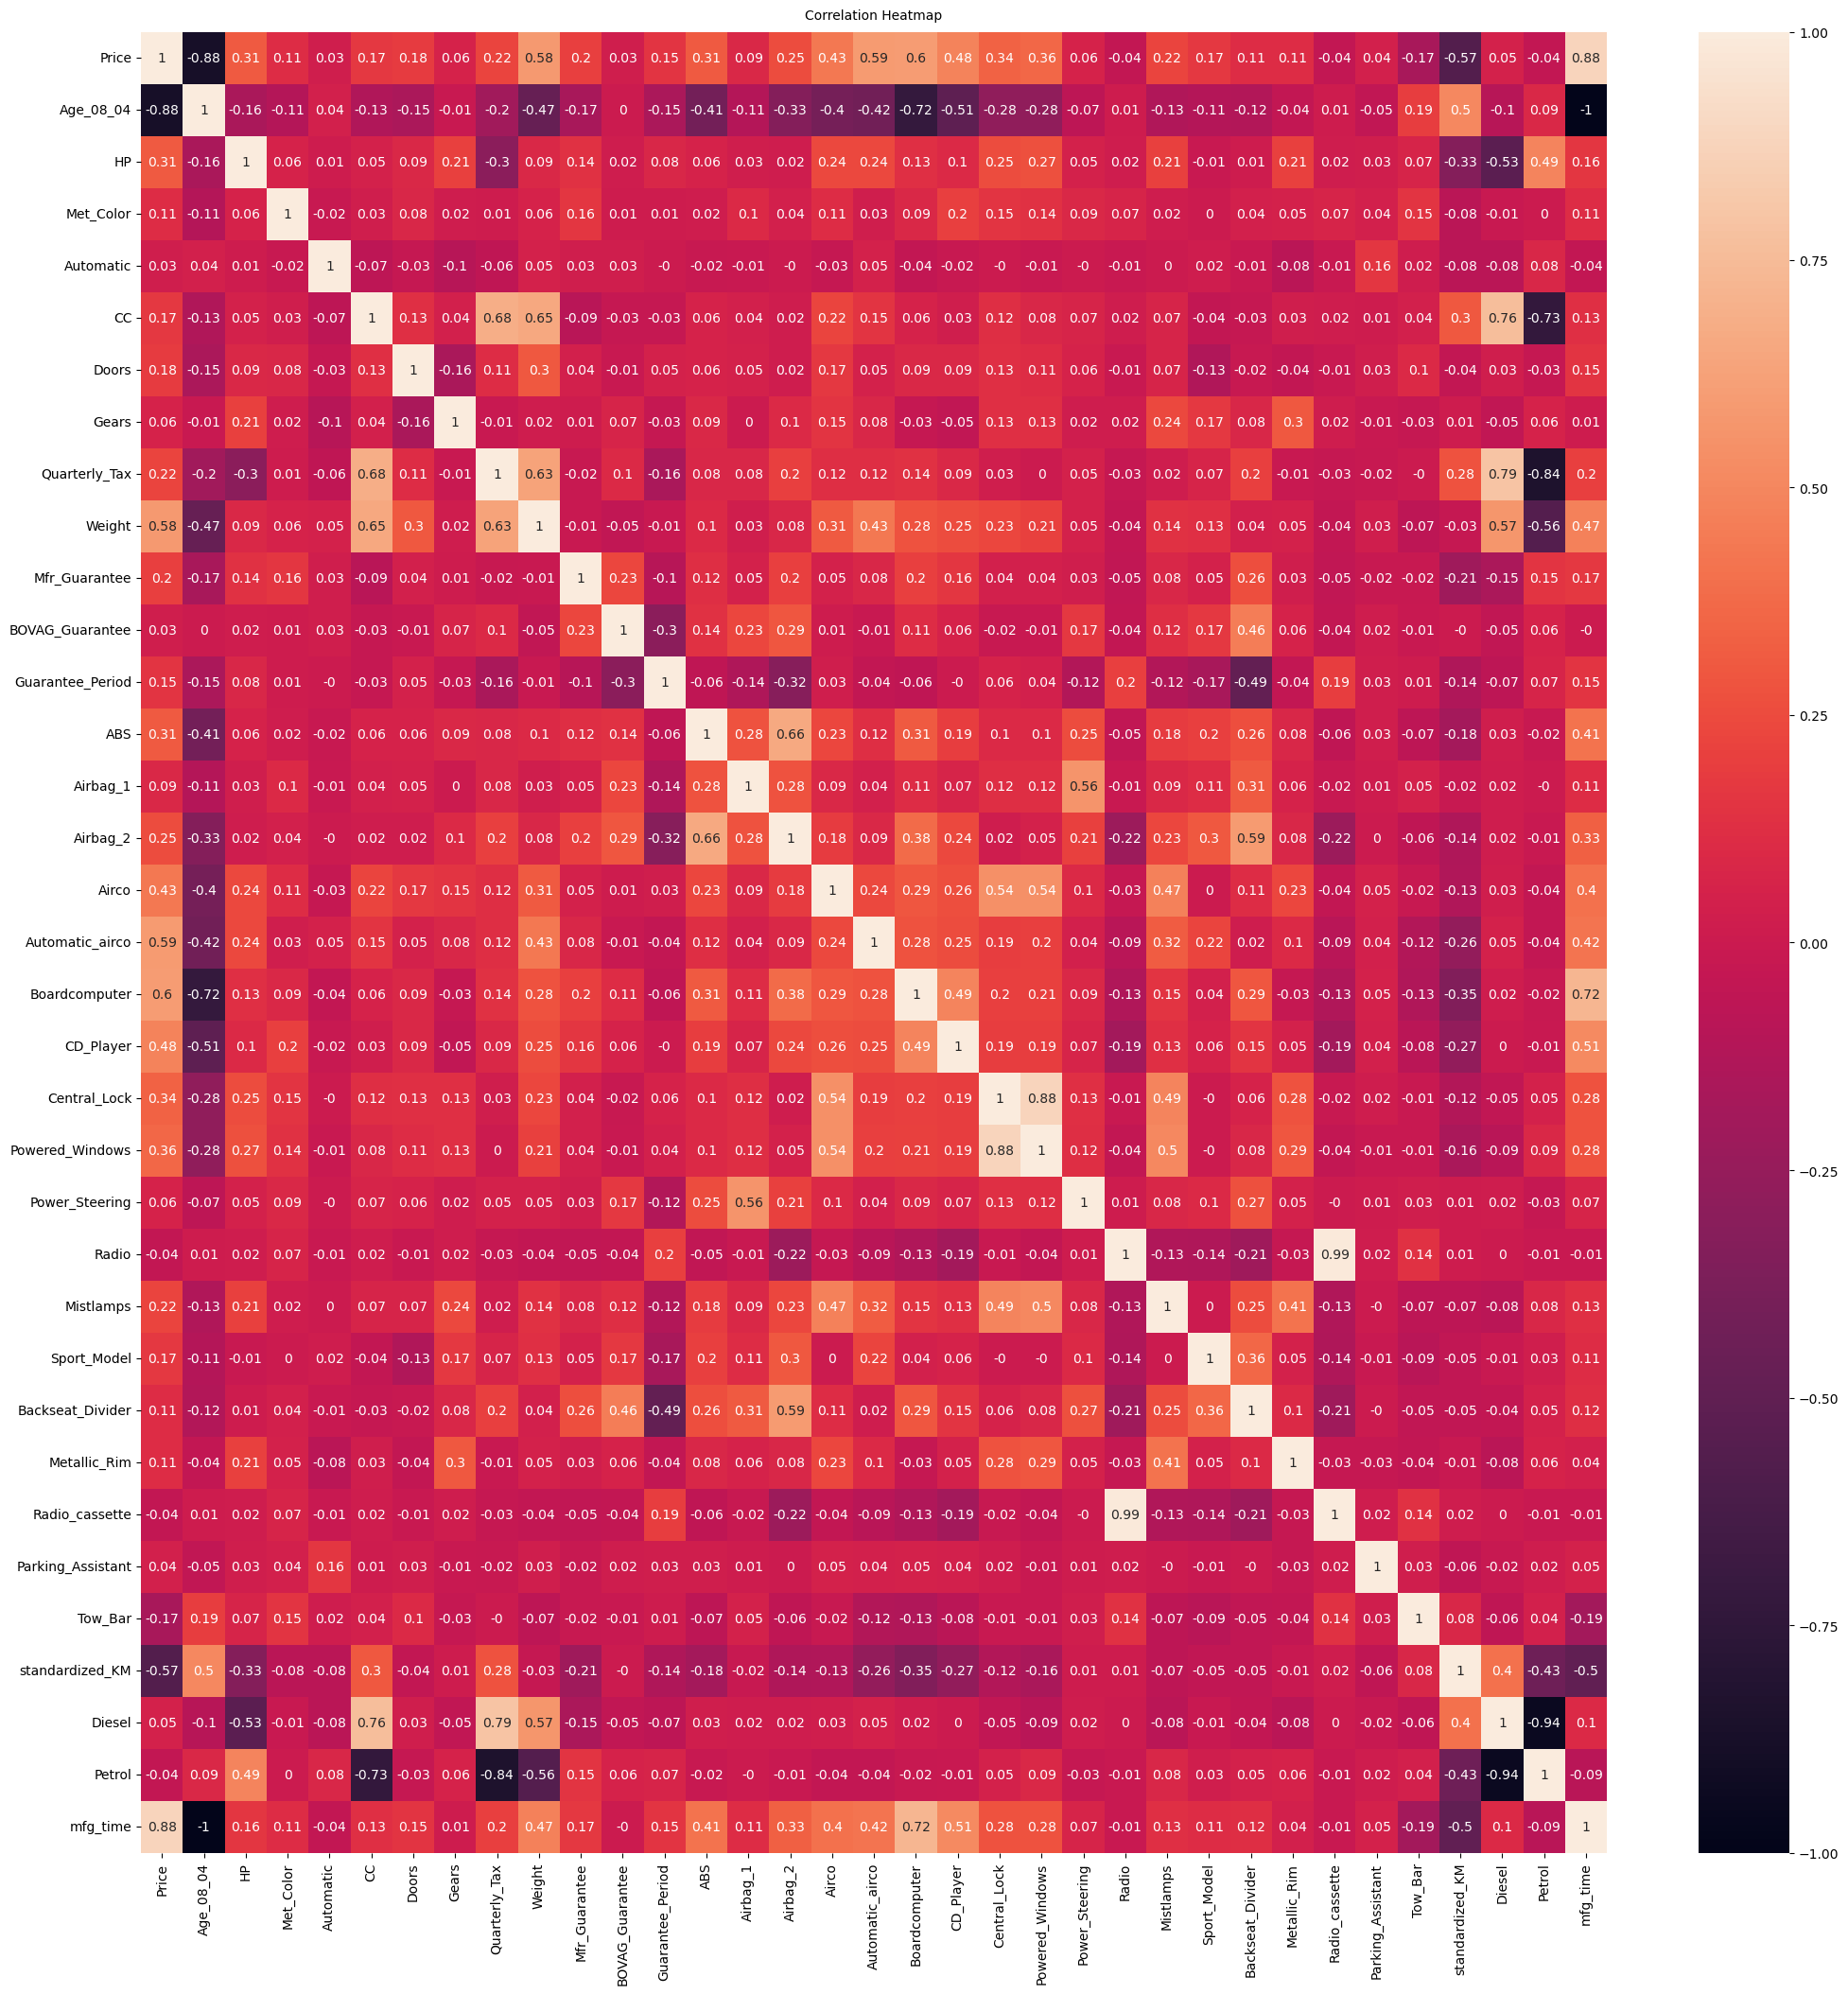

In [15]:
# Draw a heatmap to identify the key attributes which may be contributing to the prices of the car

plt.figure(figsize=(25, 25))
heatmap = sns.heatmap(corr_array, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=10);

#Here are the observations

1. The older vehicles are priced lower in comparison to the newer vehicles. Also Kilometers on the odometer also seems to impact the prices as more the miles the prices should be lower. However, it could also be confirmed that these are not the only reasons which determines the prices. Other factors may also impact the price.
2. Boardcomputers kinda started coming as default after year 1999 manufacturing units and has been a default functionality. So the cars with no boardcomputers and huge KM readings on odometer would be at disadvantage in price point market.
3. Weight and Fuel Type impacts the quarterly tax and seem to have strong relationship. The diesel cars with higher weights are taxed more in comparison to the CNG cars and lighter weights. 
4. Almost all the cars which have the powered windows have the central locks.

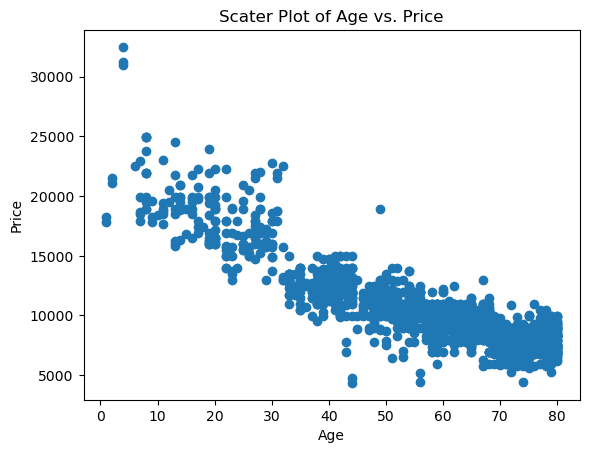

In [16]:
plt.scatter(toyota_df['Age_08_04'],toyota_df['Price'])
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Scater Plot of Age vs. Price')
#plt.colorbar(label='Make')
plt.show()

1. Looking at the scatter plot it suggests that as the vehicle ages its prices go down in general trend.

# Partition The data into 3 dummy sets

In [17]:
# Uses 50-30--20 split
# randomly sample 50% of the row IDs for training
trainData = toyota_df.sample(frac=0.5, random_state=1)
# sample 30% of the row IDs into the validation set, drawing only from records
# not already in the training set; 60% of 50% is 30%
validData = toyota_df.drop(trainData.index).sample(frac=0.6, random_state=1)  
# the remaining 20% rows serve as test
testData = toyota_df.drop(trainData.index).drop(validData.index)

print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print('Test       : ', testData.shape)
print()

Training   :  (718, 43)
Validation :  (431, 43)
Test       :  (287, 43)

